# Estimating Relative Orientation using Essential Matrix 

In this exercise your tasks are to estimate the essential matrix given two images and estimate the relative orientation based on the estimated essential matrix. Two images of the checkerboard cube and the intrinsic matrix (K) are given.

## 4.4.0 Data: 3D Cube with checkerboard pattern

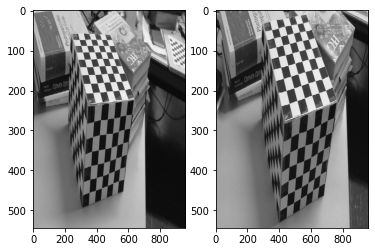

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ex4_4 as ex
import matplotlib 
%matplotlib inline

K = np.array(
 [[-1.23543537e+03,  1.08226965e+01,  2.82869653e+02],
  [-0.00000000e+00, -1.23745635e+03,  4.69737272e+02],
  [+0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

# load the input image
fig = plt.figure()
fig.add_subplot(1,2,1)
I1 = plt.imread('data/checkerboard_cube/cube0.jpg')
plt.imshow(I1, cmap = 'gray', aspect='auto')

fig.add_subplot(1,2,2)
I2 = plt.imread('data/checkerboard_cube/cube1.jpg')
plt.imshow(I2, cmap = 'gray', aspect='auto')
plt.show()

## 4.4.1 Select enough correspondences to estimate the Essential Matrix [5.0]


 Please click  11  points in the first image...


 Points in the first image:
  [[490.63304993 309.446171     1.        ]
 [452.51753653 565.25990514   1.        ]
 [222.35847487 634.16102551   1.        ]
 [237.01828771 346.82869375   1.        ]
 [ 61.10053357 482.43196257   1.        ]
 [ 59.63455229 242.01103191   1.        ]
 [282.46370753 221.48729393   1.        ]
 [381.41744423 445.78243046   1.        ]
 [160.78726092 429.65663633   1.        ]
 [303.72043616 539.60523266   1.        ]
 [122.67174752 473.63607486   1.        ]]


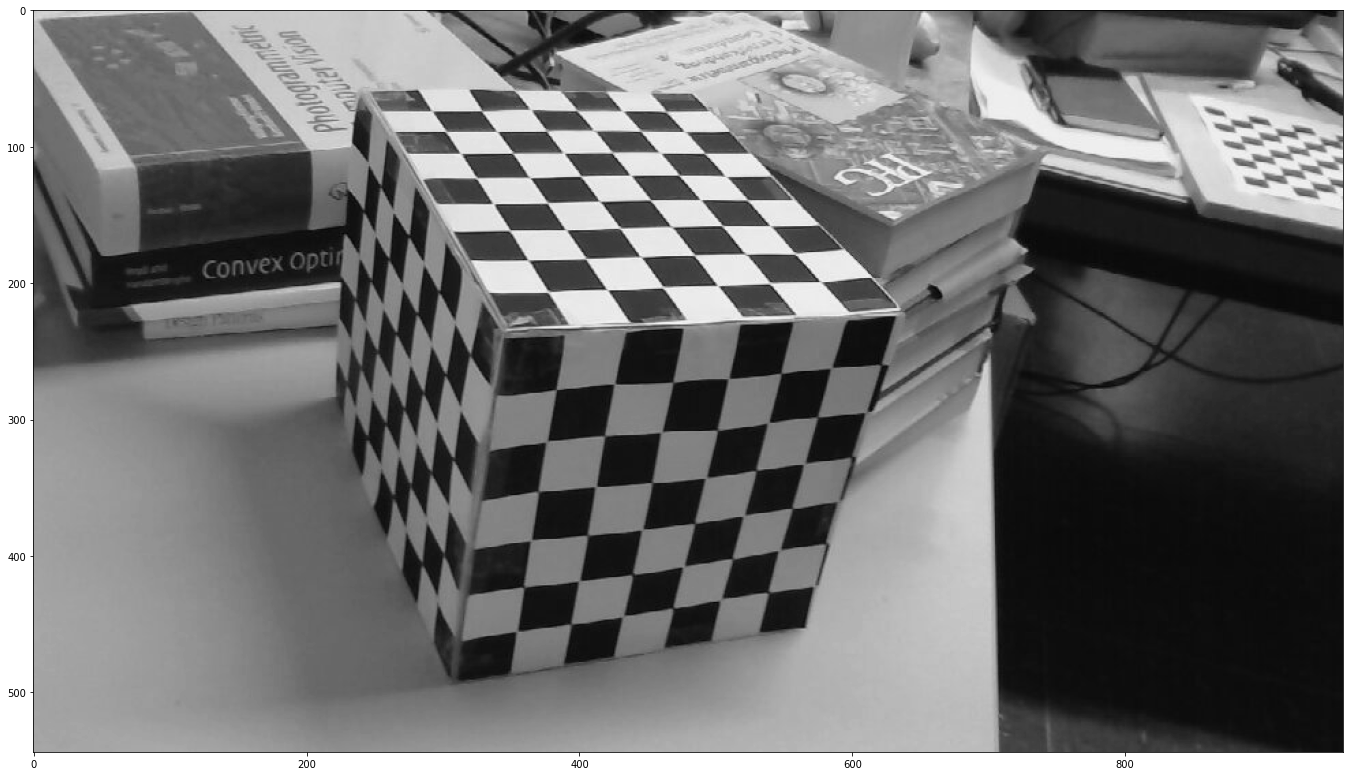

In [12]:
import matplotlib
matplotlib.use('TkAgg')

# At least 7 pairs, I choose 11 pairs
num_corr = 11  # please sepecify the needed points here, to estimate E, we need at least 7 pairs.
new_order = [1, 0]  # Switch x & y axis st normal from image plane is towards camera origin

print("\n Please click ", num_corr, " points in the first image...\n")

# Get observed correspondences from user
I1 = plt.imread('data/checkerboard_cube/cube0.jpg')
plt.imshow(I1, cmap='gray')
pts1 = np.array(plt.ginput(num_corr))
pts1 = pts1[:, new_order]

pts1 = ex.gen_homogeneous_pts(pts1)
print("\n Points in the first image:\n ", pts1)

In [13]:
# Save these point into npy data
np.save('point_pair_cube_0.npy', pts1)


 Please click  11  corresponding points in the second image...


 Points in the second image:
  [[529.48155397 396.67205743   1.        ]
 [462.04641488 676.67448276   1.        ]
 [227.48940936 758.03644405   1.        ]
 [276.59978239 427.4576644    1.        ]
 [  9.79118862 565.99289578   1.        ]
 [ 32.51389853 291.12140494   1.        ]
 [267.80389469 285.99047045   1.        ]
 [409.27108864 546.20214844   1.        ]
 [159.32127963 517.6155134    1.        ]
 [324.24417414 648.08784772   1.        ]
 [ 98.48305633 562.32794257   1.        ]]


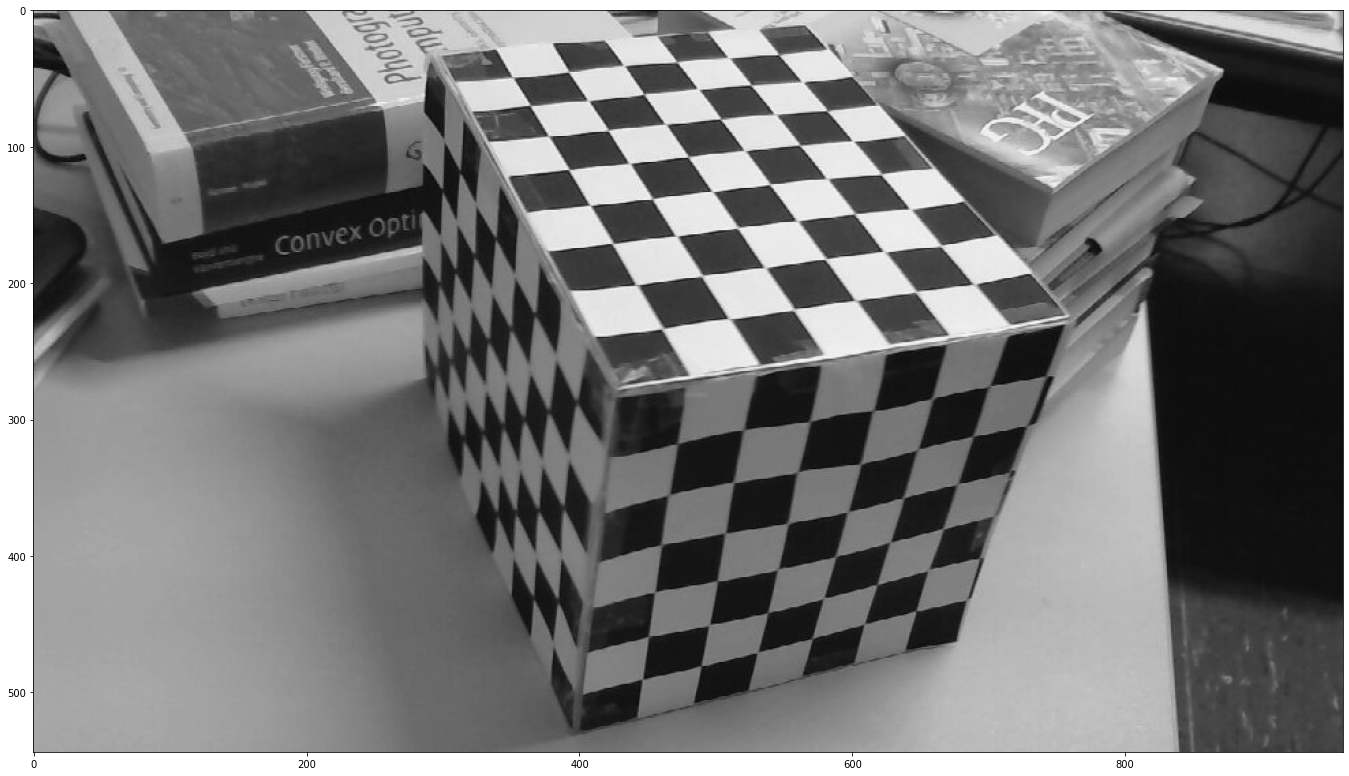

In [14]:
print("\n Please click ", num_corr, " corresponding points in the second image...\n")

I2 = plt.imread('data/checkerboard_cube/cube1.jpg')
plt.imshow(I2, cmap='gray')
pts2 = np.array(plt.ginput(num_corr))
pts2 = pts2[:, new_order]
    
pts2 = ex.gen_homogeneous_pts(pts2)    
print("\n Points in the second image:\n ", pts2)

In [15]:
# Save these point into npy data
np.save('point_pair_cube_1.npy', pts2)

In [3]:
# OK, NEXT TIME RUN, JUST RUN FROM THIS CELL 
import numpy as np
import ex4_4 as ex


pts1 = np.load('point_pair_cube_0.npy')
pts2 = np.load('point_pair_cube_1.npy')
print("\n Points in the first image:\n ", pts1)
print("\n Points in the second image:\n ", pts2)


 Points in the first image:
  [[490.63304993 309.446171     1.        ]
 [452.51753653 565.25990514   1.        ]
 [222.35847487 634.16102551   1.        ]
 [237.01828771 346.82869375   1.        ]
 [ 61.10053357 482.43196257   1.        ]
 [ 59.63455229 242.01103191   1.        ]
 [282.46370753 221.48729393   1.        ]
 [381.41744423 445.78243046   1.        ]
 [160.78726092 429.65663633   1.        ]
 [303.72043616 539.60523266   1.        ]
 [122.67174752 473.63607486   1.        ]]

 Points in the second image:
  [[529.48155397 396.67205743   1.        ]
 [462.04641488 676.67448276   1.        ]
 [227.48940936 758.03644405   1.        ]
 [276.59978239 427.4576644    1.        ]
 [  9.79118862 565.99289578   1.        ]
 [ 32.51389853 291.12140494   1.        ]
 [267.80389469 285.99047045   1.        ]
 [409.27108864 546.20214844   1.        ]
 [159.32127963 517.6155134    1.        ]
 [324.24417414 648.08784772   1.        ]
 [ 98.48305633 562.32794257   1.        ]]


In [5]:
K = np.array(
 [[-1.23543537e+03,  1.08226965e+01,  2.82869653e+02],
  [-0.00000000e+00, -1.23745635e+03,  4.69737272e+02],
  [+0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [6]:
# compute essential matrix from point pairs
E = ex.E_from_point_pairs(pts1, pts2, K)
print('\n Essential Matrix:\n', E)

(11, 3)
(11, 3)
(11, 9)
[[ 3.32564467e-02 -2.57897253e-02 -1.99098135e-01 -9.86255477e-03
   7.64821871e-03  5.90446803e-02 -1.67035450e-01  1.29532731e-01
   1.00000000e+00]
 [ 2.02156770e-02  1.13084435e-02 -1.46496225e-01  2.30765328e-02
   1.29087770e-02 -1.67227887e-01 -1.37994525e-01 -7.71927294e-02
   1.00000000e+00]
 [ 2.04581950e-03 -5.68501941e-03  4.27855660e-02 -1.11399576e-02
   3.09562379e-02 -2.32977246e-01  4.78156464e-02 -1.32872366e-01
   1.00000000e+00]
 [ 2.04136763e-04  5.33798217e-04  5.37433597e-03  1.29776923e-03
   3.39354307e-03  3.41665446e-02  3.79836252e-02  9.93235666e-02
   1.00000000e+00]
 [ 3.95357584e-02 -2.26057408e-03  2.20356829e-01 -1.39559622e-02
   7.97973474e-04 -7.77850659e-02  1.79416988e-01 -1.02586977e-02
   1.00000000e+00]
 [ 3.71739759e-02  3.75251303e-02  2.03910234e-01  2.63141980e-02
   2.65627683e-02  1.44341145e-01  1.82305592e-01  1.84027695e-01
   1.00000000e+00]
 [ 2.81515954e-05  2.70737036e-03  1.34954801e-02  3.09745191e-04
   2

## 4.4.2 Estimate the relative orientation based on the Essential matrix [5.0]

In [9]:
# given E compute relative orientation",
Z = np.array([[ 0, 1, 0],
              [-1, 0, 0],
              [ 0, 0, 0]])
W = np.array([[0, -1, 0],
              [1,  0, 0],
              [0,  0, 1]])

W_CHECK = [W, W.T]
Z_CHECK = [Z, Z.T]

num_solution = 0
R_final = None
b_final = None
for w in W_CHECK:
    for z in Z_CHECK:
        R, Sb = ex.relative_orientation_from_E(E, z, w)
        b = np.array([-Sb[1, 2], Sb[0, 2], -Sb[0, 1]])

        # Triangulate points in coord system of 1st cam
        X0 = ex.triangulate_points(pts1, pts2, K, R, b)

        # Triangulated points in coord system of 2nd cam
        X1 = np.dot(R.T, (X0 - b).T).T

        if ex.point_in_front_of_cam(X0) and ex.point_in_front_of_cam(X1):
            print('Final Rotation:\n', R)
            R_final = R
            print('Final Baseline:\n', b)
            b_final = b
            num_solution += 1
print(f'NUMBER OF SOLUTION: {num_solution}')
print(f'FINAL ROTATION: \n{R_final}')
print(f'FINAL BASELINE: \n{b_final}')
            

R = [[ 0.9954142  -0.02167683  0.09317022]
 [ 0.02542876  0.99890491 -0.0392728 ]
 [-0.09221688  0.0414619   0.99487535]]
t = [0.57047819 0.07089125 0.81824756]
Sb = [[ 0.         -0.81824756  0.07089125]
 [ 0.81824756  0.         -0.57047819]
 [-0.07089125  0.57047819  0.        ]]
R = [[ 0.9954142  -0.02167683  0.09317022]
 [ 0.02542876  0.99890491 -0.0392728 ]
 [-0.09221688  0.0414619   0.99487535]]
t = [-0.57047819 -0.07089125 -0.81824756]
Sb = [[ 0.          0.81824756 -0.07089125]
 [-0.81824756  0.          0.57047819]
 [ 0.07089125 -0.57047819  0.        ]]
Final Rotation:
 [[ 0.9954142  -0.02167683  0.09317022]
 [ 0.02542876  0.99890491 -0.0392728 ]
 [-0.09221688  0.0414619   0.99487535]]
Final Baseline:
 [-0.57047819 -0.07089125 -0.81824756]
R = [[-0.43154382  0.12707104  0.89309735]
 [ 0.04464136 -0.98580796  0.16183269]
 [ 0.90098672  0.10970698  0.41974671]]
t = [0.57047819 0.07089125 0.81824756]
Sb = [[ 0.         -0.81824756  0.07089125]
 [ 0.81824756  0.         -0.57047

## 4.4.3  Sanity check the result

In [ ]:
# Read more and I'll come back this weekend !!!!